# Color compression of an image with K-Means Clustering Algorithm

### loading of libraries

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.datasets import load_sample_image
china = load_sample_image(r'C:\dataset\me.jpg')
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(china)


AttributeError: Cannot find sample image: C:\dataset\me.jpg

### dimensions of array

In [24]:
china.shape

(427, 640, 3)

### reshaping the data to n_samples by n_features and rescaling the colors so that they lie between 0 and 1

In [25]:
data = china/255.0 # use 0...1 scale
data = data.reshape(427*640,3)
data.shape

(273280, 3)

### visualizing these pixels in this color space, using a subset of 10,000 pixels for efficiency

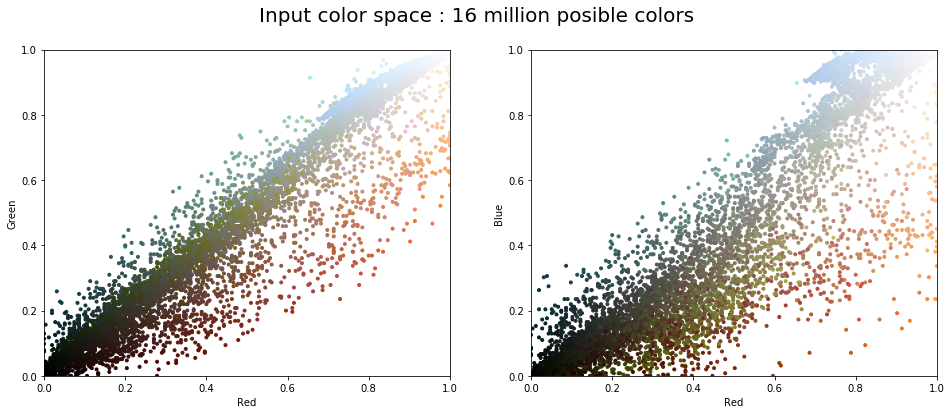

In [26]:
def plot_pixels(data,title,colors=None,N=10000):
        if colors is None:
            colors = data
        # choose a random subset
        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:N]
        colors = colors[i]
        R,G,B = data[i].T
        
        fig,ax = plt.subplots(1,2,figsize=(16,6))
        ax[0].scatter(R,G,color=colors,marker='.')
        ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
        
        ax[1].scatter(R,B,color=colors,marker='.')
        ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
        
        fig.suptitle(title,size=20)
        
plot_pixels(data,title="Input color space : 16 million posible colors")


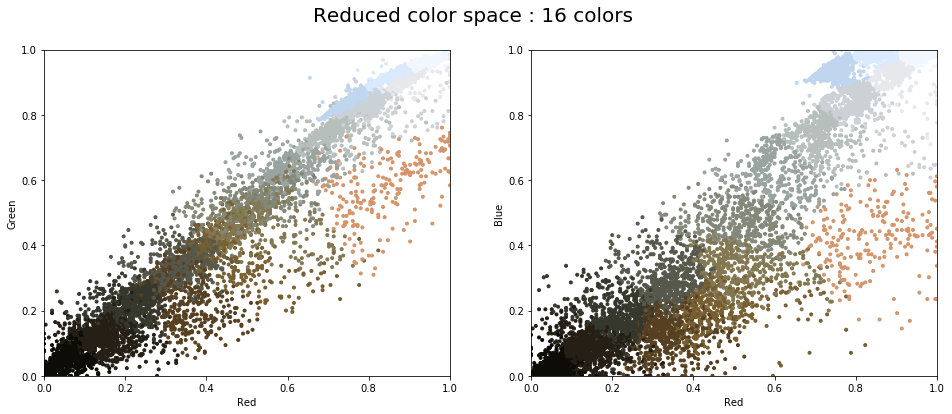

In [27]:
import warnings
#warnings.simplefilter('ignore') # fix numpy issues
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data,title="Reduced color space : 16 colors ",colors=new_colors)

Text(0.5,1,'16-color Image')

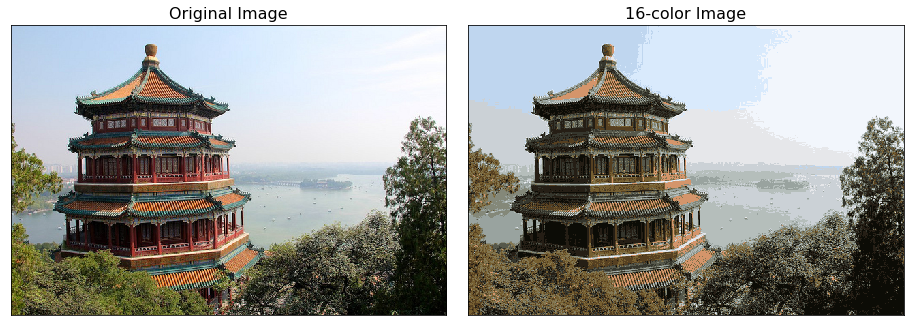

In [28]:
china_recolored = new_colors.reshape(china.shape)

fig,ax = plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image',size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image',size=16)